In [92]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd
import dataframe_image as dfi
import random 

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split

# Import para padronização dos dados
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
from platform import python_version
print(python_version())

3.11.5


In [3]:
%reload_ext watermark
%watermark -a "José Guilherme Daufenbach Júnior" --iversion

Author: José Guilherme Daufenbach Júnior

seaborn        : 0.12.2
matplotlib     : 3.8.0
sklearn        : 1.3.0
statsmodels    : 0.14.0
numpy          : 1.24.3
dataframe_image: 0.1.1
pandas         : 2.1.1
scipy          : 1.11.3



In [4]:
# Import dos dados
dados_1 = pd.read_csv('dados_rj.csv', sep=';')

colunas = ['condominio', 'quartos', 'suites', 'vagas',
           'area', 'bairro', 'atualizacao', 'distancia', 'pm2', 'preco']

# reordenando colunas
dados_1 = dados_1.reindex(columns = colunas)
dados_1.head()

,condominio,quartos,suites,vagas,area,bairro,atualizacao,distancia,pm2,preco
0,350,1,0.0,1.0,21,1,1,99.0,16190.48,340000
1,800,1,0.0,1.0,64,1,0,99.0,12031.25,770000
2,674,1,0.0,1.0,61,1,1,99.0,9836.07,600000
3,700,1,1.0,1.0,70,1,0,99.0,10000.00,700000
4,440,1,0.0,1.0,44,1,2,99.0,11704.55,515000


In [5]:
#Atualizando valor pelo IGP-M
lista_igpm = ['condominio', 'pm2', 'preco']

for c in lista_igpm:
    dados_1[c] = dados_1[c]*1.5

In [6]:
dados_1.head()

,condominio,quartos,suites,vagas,area,bairro,atualizacao,distancia,pm2,preco
0,525.0,1,0.0,1.0,21,1,1,99.0,24285.720,510000.0
1,1200.0,1,0.0,1.0,64,1,0,99.0,18046.875,1155000.0
2,1011.0,1,0.0,1.0,61,1,1,99.0,14754.105,900000.0
3,1050.0,1,1.0,1.0,70,1,0,99.0,15000.000,1050000.0
4,660.0,1,0.0,1.0,44,1,2,99.0,17556.825,772500.0


In [7]:
# Distorcendo Varável pm2

lista = dados_1['pm2'].values
for c in range(len(lista)):
    lista[c] = lista[c] * random.uniform(0.8,1.5)
    
dados_1['pm2'] = lista



In [8]:
dados_1.sample(10)

,condominio,quartos,suites,vagas,area,bairro,atualizacao,distancia,pm2,preco
1011,750.0,3,1.0,1.0,80,4,60,99.00,3982.187256,342000.0
575,675.0,1,0.0,1.0,70,7,15,99.00,13725.783005,795000.0
1550,435.0,1,1.0,1.0,36,3,720,99.00,48800.265676,1260000.0
1347,420.0,1,1.0,1.0,65,1,0,99.00,14137.684549,867000.0
88,1125.0,3,1.0,1.0,86,1,0,99.00,10517.437054,1080000.0
1957,600.0,3,0.0,1.0,80,7,0,99.00,13000.524274,735000.0
551,2325.0,3,1.0,1.0,110,6,1,0.77,30792.758127,2685000.0
1654,1050.0,2,1.0,1.0,90,4,0,99.00,12232.615313,937500.0
432,2250.0,3,1.0,1.0,124,5,0,0.60,33812.978031,3750000.0
1557,1050.0,1,1.0,1.0,55,3,0,99.00,22580.292737,930000.0


## Análise Exploratória:

In [9]:
dados_1.shape

(1997, 10)

In [10]:
dados_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   condominio   1997 non-null   float64
 1   quartos      1997 non-null   int64  
 2   suites       1997 non-null   float64
 3   vagas        1997 non-null   float64
 4   area         1997 non-null   int64  
 5   bairro       1997 non-null   int64  
 6   atualizacao  1997 non-null   int64  
 7   distancia    1997 non-null   float64
 8   pm2          1997 non-null   float64
 9   preco        1997 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 156.1 KB


In [11]:
dados_1.dtypes

condominio     float64
quartos          int64
suites         float64
vagas          float64
area             int64
bairro           int64
atualizacao      int64
distancia      float64
pm2            float64
preco          float64
dtype: object

## Análise Univariada:

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use is

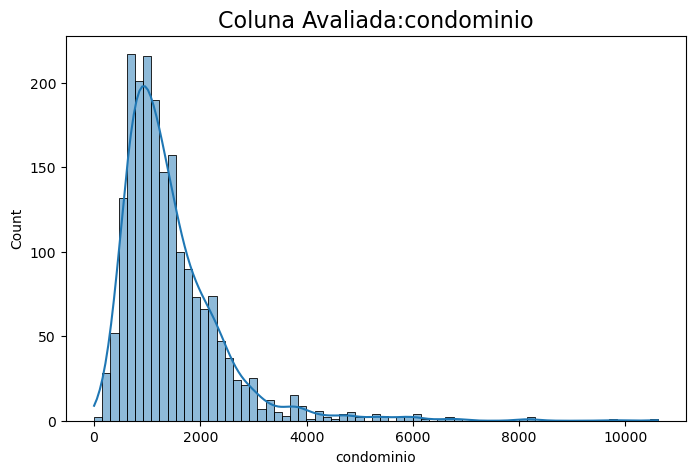

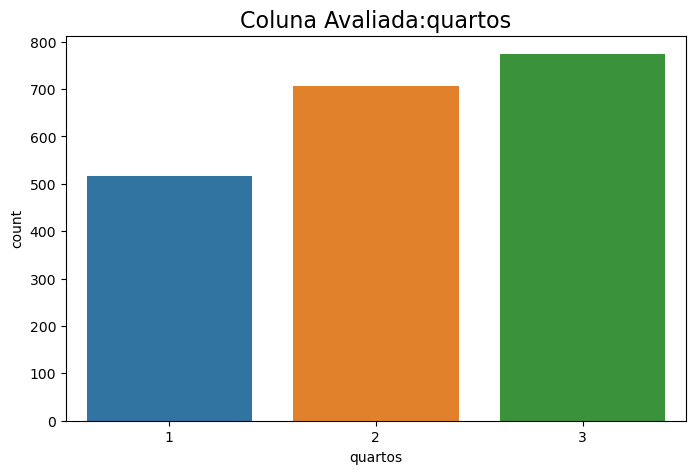

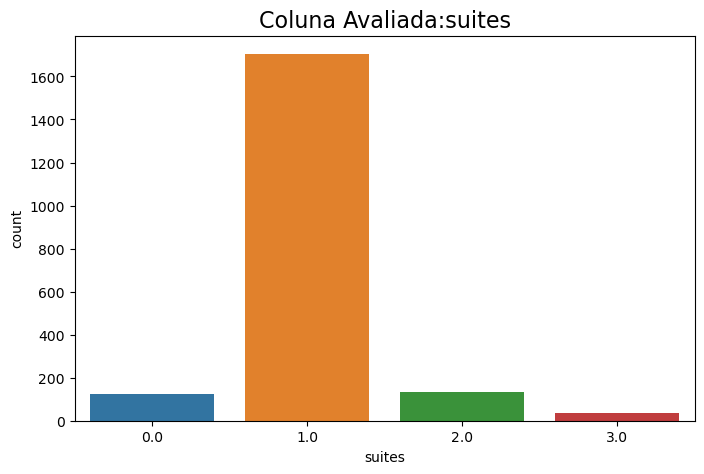

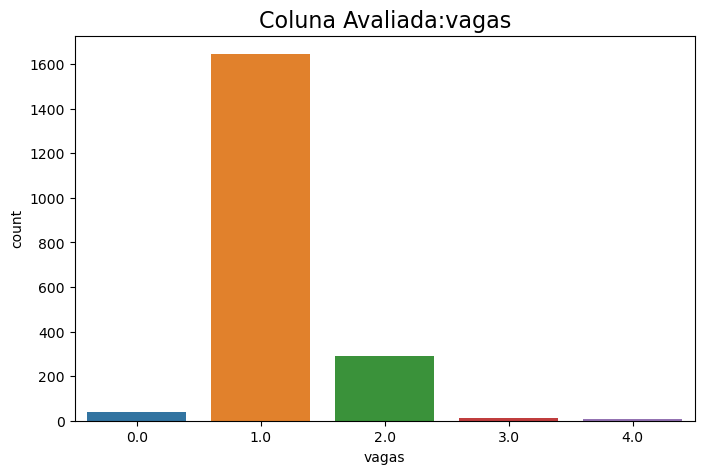

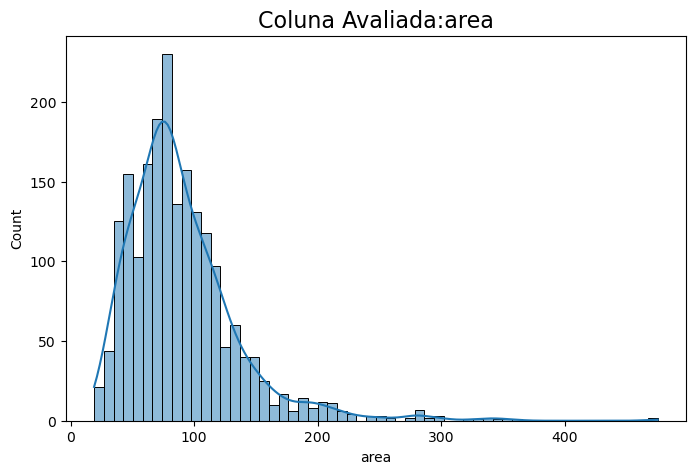

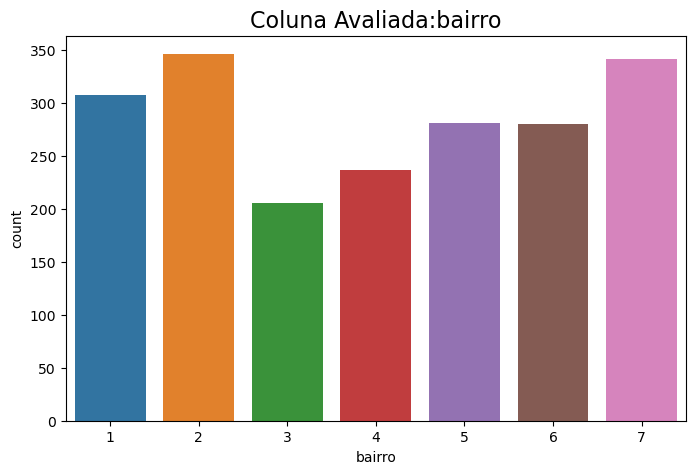

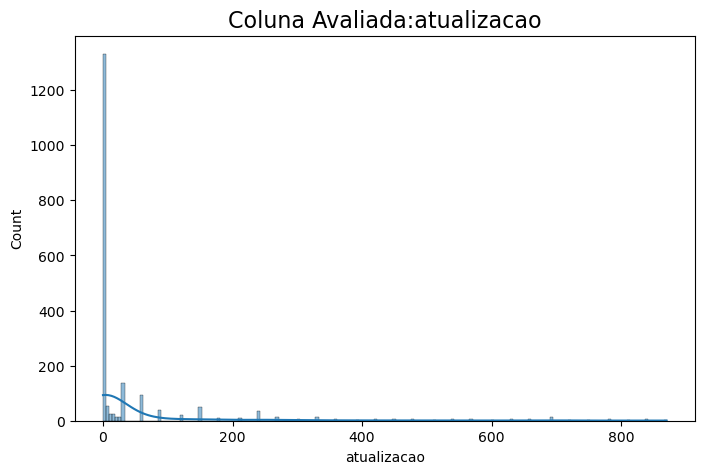

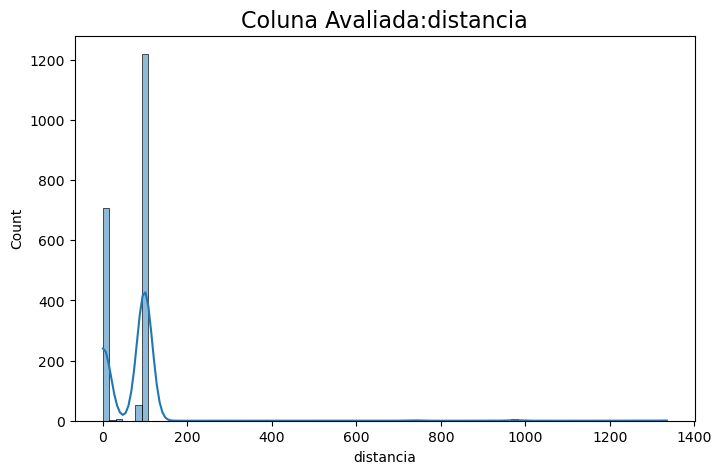

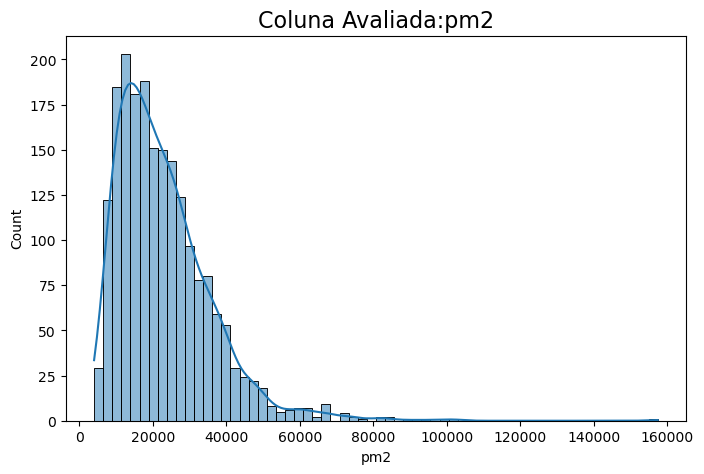

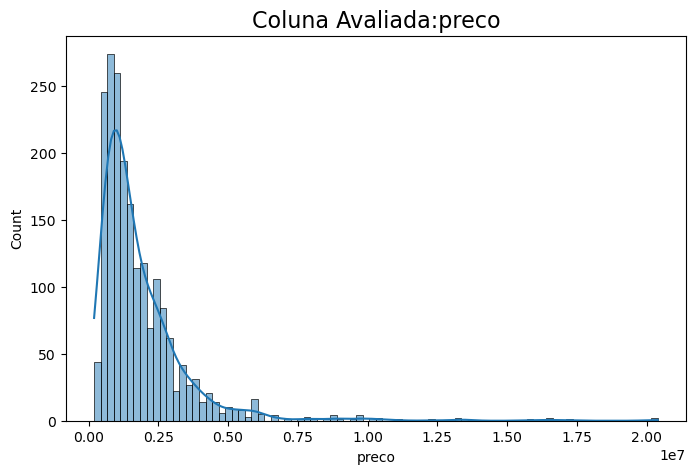

In [12]:
for c in dados_1.columns:
    if dados_1[c].nunique()>30:
        plt.figure(figsize=(8,5))
        plt.title(f"Coluna Avaliada:{c}", fontsize = 16)
        sns.histplot(dados_1[c], kde=True)
    else:
        plt.figure(figsize=(8,5))
        plt.title(f"Coluna Avaliada:{c}", fontsize = 16)
        sns.countplot(x = dados_1[c])

**Aplicando transformação logarítimica na variável alvo afim de melhorar a sua distribuição.**

In [13]:
dados_1['log_preco'] = np.log(dados_1['preco'])

In [14]:
dados_1.head()

,condominio,quartos,suites,vagas,area,bairro,atualizacao,distancia,pm2,preco,log_preco
0,525.0,1,0.0,1.0,21,1,1,99.0,31571.650997,510000.0,13.142166
1,1200.0,1,0.0,1.0,64,1,0,99.0,18100.805177,1155000.0,13.959611
2,1011.0,1,0.0,1.0,61,1,1,99.0,12114.480603,900000.0,13.710150
3,1050.0,1,1.0,1.0,70,1,0,99.0,22138.927350,1050000.0,13.864301
4,660.0,1,0.0,1.0,44,1,2,99.0,15488.598621,772500.0,13.557387


/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_preco', ylabel='Count'>

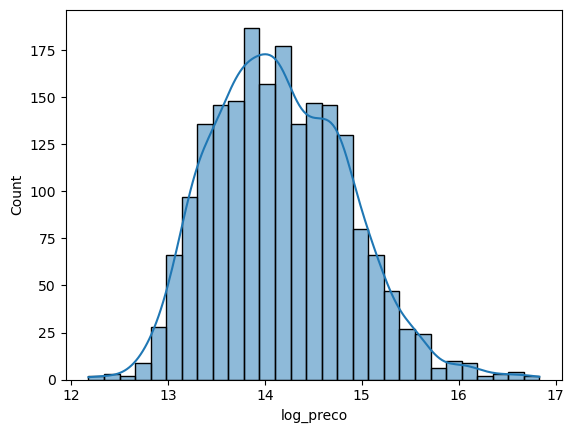

In [15]:
sns.histplot(dados_1['log_preco'], kde = True)

In [16]:
# Criando tabela com os coeficientes de skewness

dict_skew = {}
for c in dados_1.columns:

    dict_skew[c] = stats.skew(dados_1[c])


df_skew = np.transpose(pd.DataFrame(data = dict_skew.values(), index=dict_skew.keys(), columns=[ 'Skewness']))
df_skew

,condominio,quartos,suites,vagas,area,bairro,atualizacao,distancia,pm2,preco,log_preco
Skewness,2.778923,-0.233295,1.361631,2.06846,2.194677,-0.007745,3.520875,7.934061,1.939649,4.19816,0.397655


In [17]:
# Salvando imagem da tabela de skewness
#dfi.export(df_skew, 'skewness_tab.png')

In [18]:
tab_resumo_est = dados_1.describe()
tab_resumo_est

,condominio,quartos,suites,vagas,area,bairro,atualizacao,distancia,pm2,preco,log_preco
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03,1997.000000
mean,1456.631447,2.128693,1.039559,1.153230,90.051577,4.023035,55.635954,68.447531,22922.311320,1.844115e+06,14.160790
std,980.840537,0.793866,0.443091,0.453837,46.417486,2.102215,144.306062,82.046778,13070.165416,1.733713e+06,0.697401
min,1.500000,1.000000,0.000000,0.000000,19.000000,1.000000,0.000000,0.030000,3982.187256,1.950000e+05,12.180755
25%,825.000000,1.000000,1.000000,1.000000,60.000000,2.000000,0.000000,1.330000,13420.661541,8.400000e+05,13.641157
50%,1200.000000,2.000000,1.000000,1.000000,80.000000,4.000000,0.000000,99.000000,20262.308601,1.350000e+06,14.115615
75%,1800.000000,3.000000,1.000000,1.000000,110.000000,6.000000,30.000000,99.000000,29189.640012,2.325000e+06,14.659231
max,10606.500000,3.000000,3.000000,4.000000,475.000000,7.000000,870.000000,1334.470000,157361.738452,2.040000e+07,16.831045


In [19]:
#dfi.export(tab_resumo_est, 'tab_resumo_est.png')

In [20]:
numericas = ['condominio', 'area', 'atualizacao', 'distancia', 'pm2']
categoricas = ['quartos', 'suites', 'vagas','bairro']
preditoras = numericas + categoricas
alvo = ['log_preco']

## Análise de valores extremos:

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


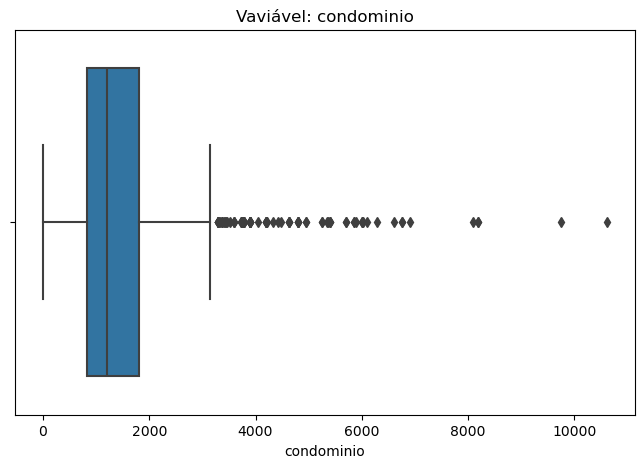

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


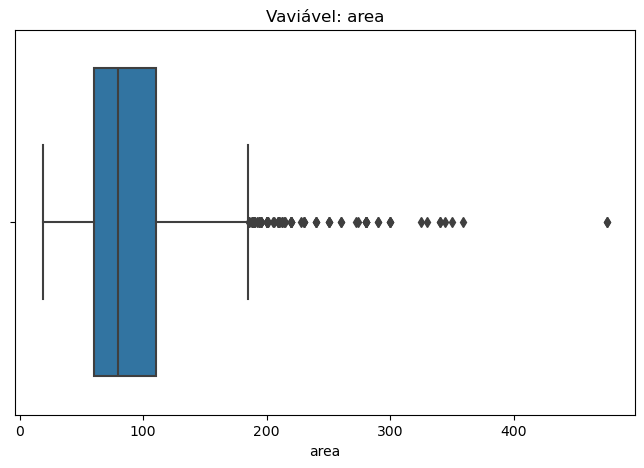

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


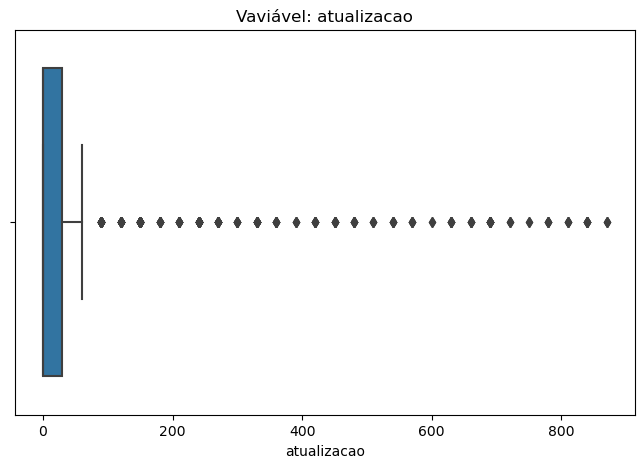

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


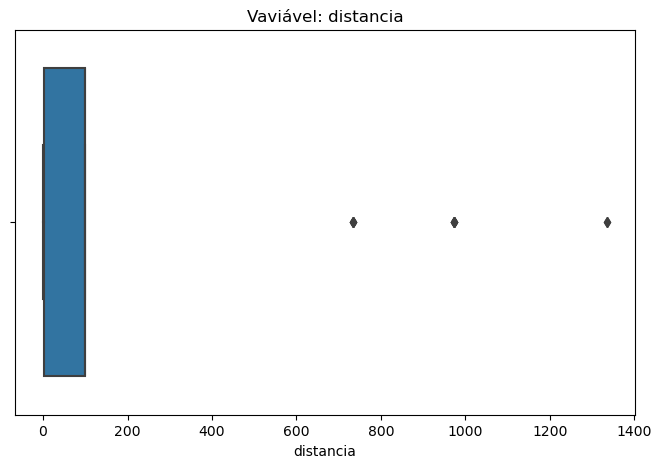

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


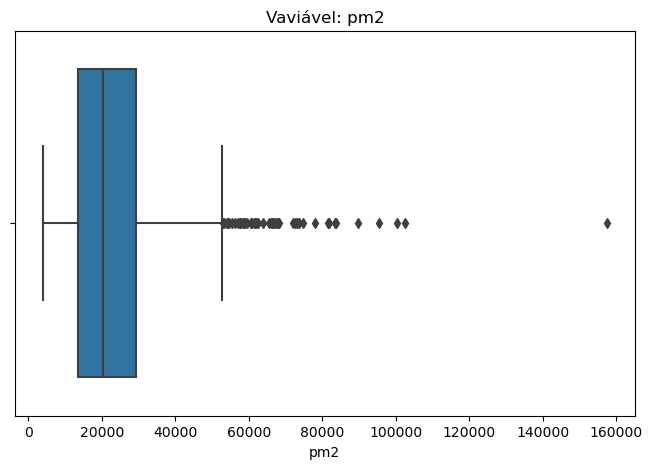

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


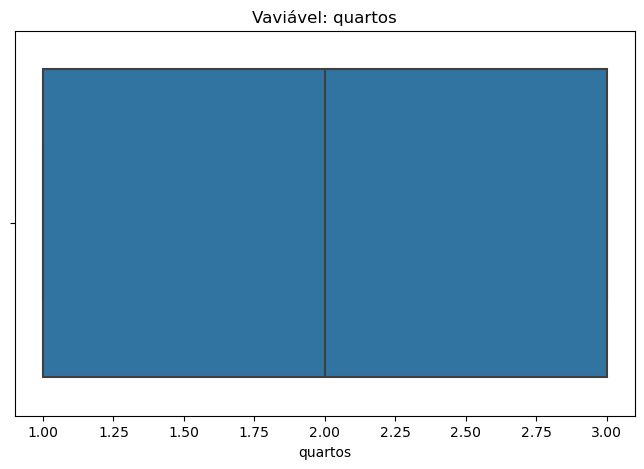

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


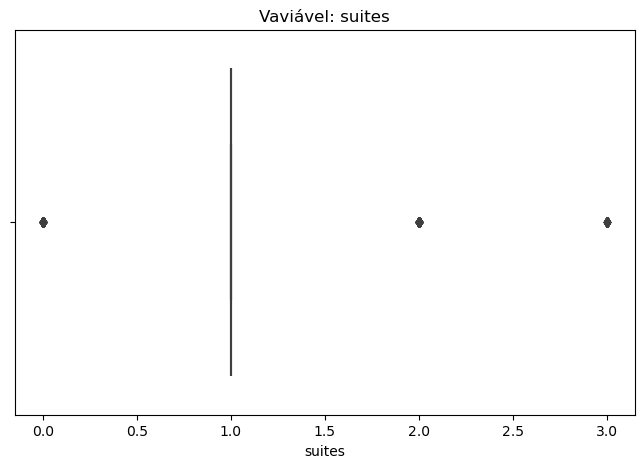

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


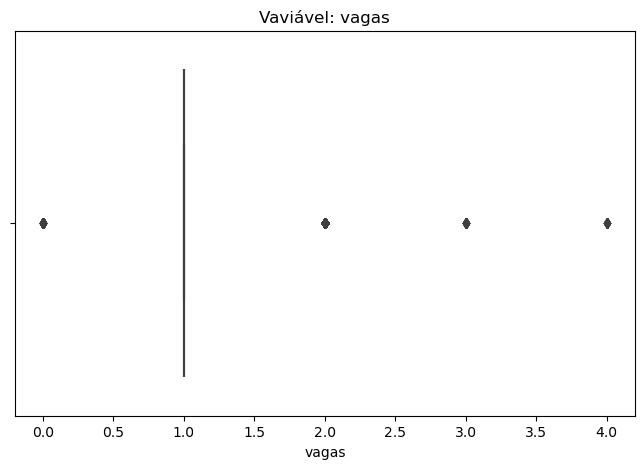

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


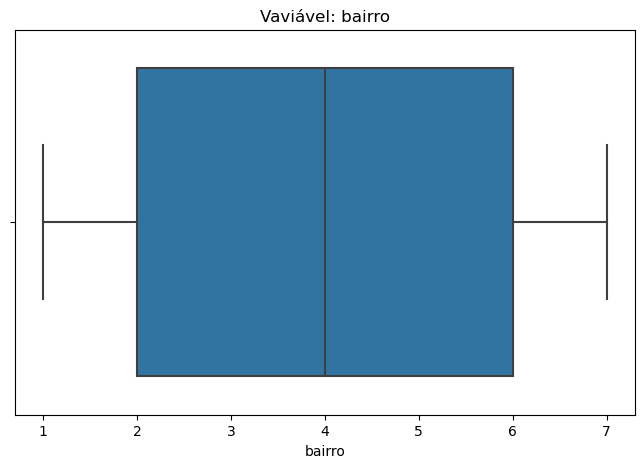

In [21]:
for c in preditoras:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=dados_1,x = c)
    plt.title("Vaviável: {}".format(c))
    plt.show()

In [22]:
len(dados_1[(dados_1.condominio < 4400) & (dados_1.area<230) & (dados_1.pm2<60000) & (dados_1.distancia < 600)])/len(dados_1)

0.9544316474712068

In [23]:
dados_2 = dados_1[(dados_1.condominio < 4400)  & 
                  (dados_1.area<230) & (dados_1.pm2<60000) & (dados_1.distancia < 600)].copy()
dados_2.drop(columns = 'preco', inplace = True)

In [24]:
len(dados_2)

1906

### Aplicando transformação log nos dados

In [25]:
# Aplicando log em todas as variáveis
for c in preditoras:
    lista = [np.log(i+1) for i in dados_2[c].values]
    dados_2[c] = lista

# Renomeando todas as variáveis preditodas
dados_2.rename(columns = {'condominio': 'log_condominio'
                          , 'quartos': 'log_quartos'
                          , 'suites': 'log_suites'
                          ,'vagas': 'log_vagas'
                          , 'area': 'log_area'
                          ,'bairro': 'log_bairro'
                          , 'atualizacao': 'log_atualizacao'
                          , 'distancia': 'log_distancia'
                          , 'pm2': 'log_pm2'}, inplace = True)

preditoras = ['log_condominio', 'log_quartos', 'log_suites', 'log_vagas', 'log_area',
       'log_bairro', 'log_atualizacao', 'log_distancia', 'log_pm2']
dados_2.head()

,log_condominio,log_quartos,log_suites,log_vagas,log_area,log_bairro,log_atualizacao,log_distancia,log_pm2,log_preco
0,6.265301,0.693147,0.000000,0.693147,3.091042,0.693147,0.693147,4.60517,10.360047,13.142166
1,7.090910,0.693147,0.000000,0.693147,4.174387,0.693147,0.000000,4.60517,9.803767,13.959611
2,6.919684,0.693147,0.000000,0.693147,4.127134,0.693147,0.693147,4.60517,9.402239,13.710150
3,6.957497,0.693147,0.693147,0.693147,4.262680,0.693147,0.000000,4.60517,10.005138,13.864301
4,6.493754,0.693147,0.000000,0.693147,3.806662,0.693147,1.098612,4.60517,9.647924,13.557387


In [26]:
tab_dados_2 = dados_2.sample(10)
#dfi.export(tab_dados_2, 'tab_dados_2.png')

## Análise Bivariada:

### Aqui buscamos as variáveis que apresentam multicolinearidade;

In [27]:
#Matriz de correlação
#dados_2.corr()

In [28]:
tab_corr_1 = dados_2.corr()
#dfi.export(tab_corr_1, 'tab_corr_1.png')

In [29]:
# Extraindo a correlação de cada variável preditora com a alvo:
lista_var = []
lista_corr = []
for c in dados_2[preditoras]:
    
    a = pearsonr(dados_2[c], dados_2['log_preco'])[0]
    
    if a > 0.3 or a < -0.3:
        
        lista_var.append(c)
        lista_corr.append(a)
        
tab_corr_2 = pd.DataFrame()
tab_corr_2['preditoras'] = lista_var
tab_corr_2['correlacao_alvo'] = lista_corr
tab_corr_2

,preditoras,correlacao_alvo
0,log_condominio,0.713708
1,log_quartos,0.531861
2,log_area,0.655196
3,log_distancia,-0.370343
4,log_pm2,0.694335


In [30]:
#dfi.export(tab_corr_2, 'tab_corr_2.png')

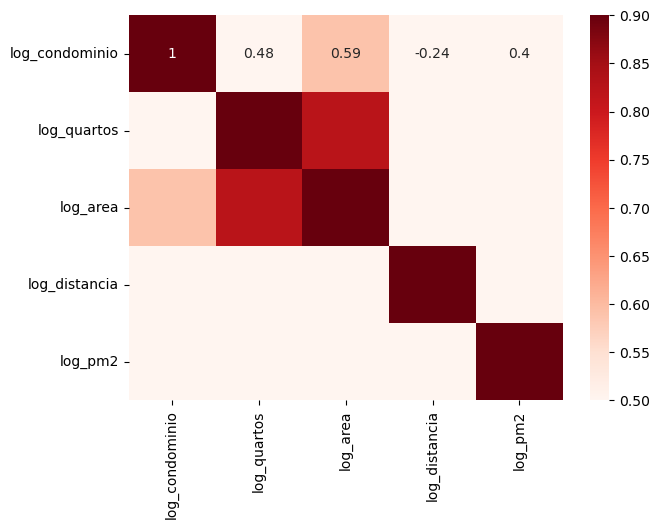

In [31]:
# Verificando a correlação entre as preditoras:
plt.figure(figsize=(7,5))
sns.heatmap(data = dados_2[lista_var].corr(), annot=True, cmap='Reds', vmax=0.9, vmin=0.5)
plt.show()

In [32]:
#Novas variáveis Preditoras
preditoras = ['log_condominio', 'log_area', 'log_distancia', 'log_pm2']

dados_3 = dados_2[preditoras + alvo].copy()
dados_3 = dados_3.astype('float64')

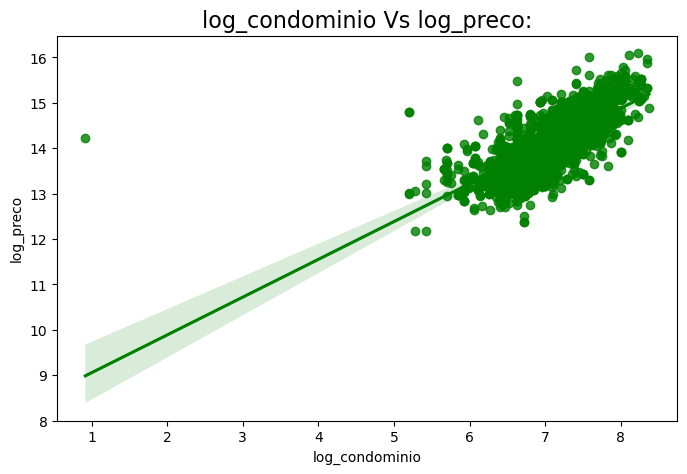

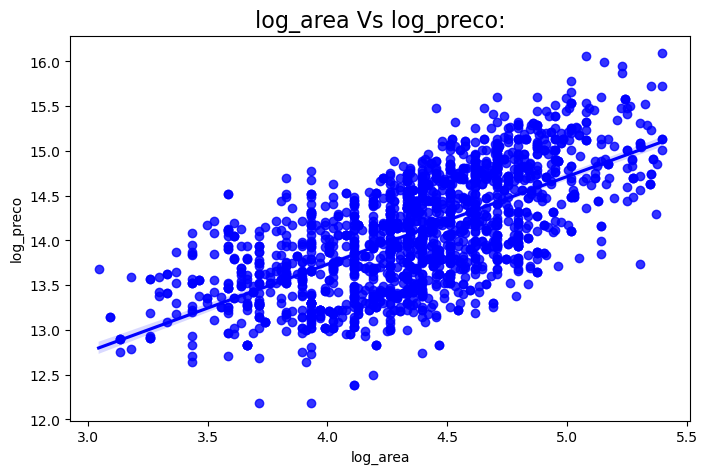

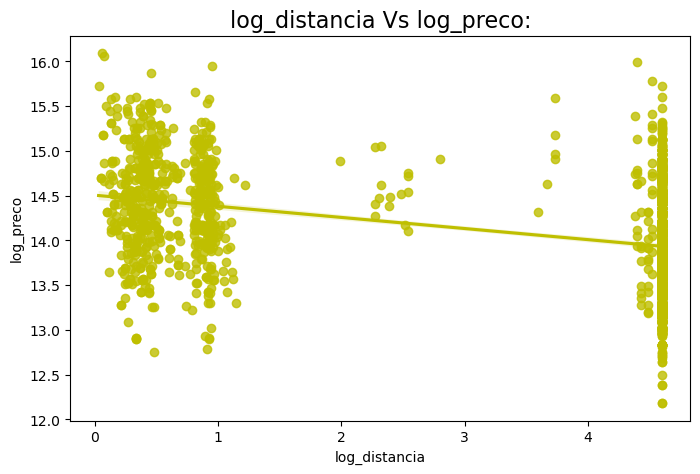

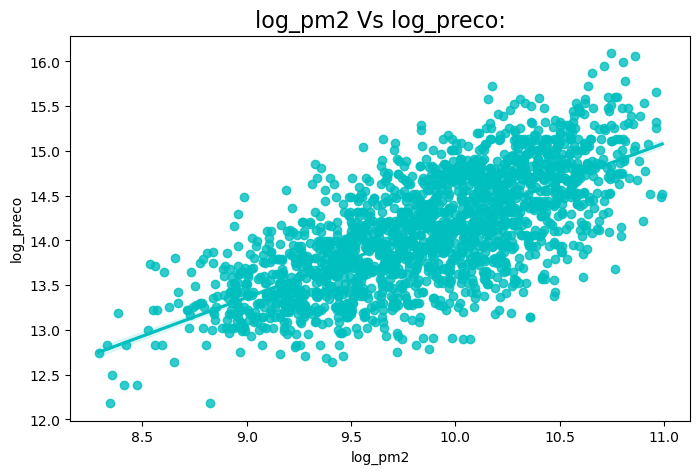

In [33]:
# Visualizando regressão simples entre as variáveis preditoras e alvo:
cont = -1
for c in preditoras:
    cont+=1
    lista_cores = ['g', 'b', 'y', 'c', 'r']
    plt.figure(figsize=(8,5))
    plt.title(f"{c} Vs log_preco:", fontsize=16)
    sns.regplot(x = c, y = 'log_preco', data = dados_3, color = lista_cores[cont]) 
    plt.show()
    

## Criação do Modelo OLS:

In [34]:
# Separando X e Y
X = dados_3.drop(columns=alvo)
Y = dados_3[alvo]

# Divide os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.3 , random_state = 1)

# Adiciona a constante 
X_treino_const = sm.add_constant(X_treino)

# Criando a segunda versão do modelo
modelo_v1 = sm.OLS(y_treino, X_treino_const).fit()

#Criando sumário estatístico do modelo
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_preco   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     4727.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:10:08   Log-Likelihood:                 536.44
No. Observations:                1334   AIC:                            -1063.
Df Residuals:                    1329   BIC:                            -1037.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4200      0.111     12.806      0.000       1.202       1.638
log_condominio     0.0880      0.011      7.812      0.000       0.066       0.110
log_area           0.9268      0.014     68.219      0.000       0.900       0.953
log_distancia     -0.0145      0.003     -5.632      0.000      -0.020      -0.009
log_pm2            0.8166      0.011     76.937      0.000       0.796       0.837
==============================================================================
Omnibus:                       68.425   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.796
Skew:                           0.181   Prob(JB):                     7.56e-08
Kurtosis:                       2.323   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Validação das Suposições da Regressão Linear


**1- Linearidade**

**2- Independência dos Erros**

**3- Homocedasticidade**

**4- Normalização dos Erros**

**5- Sem Multicolinearidade**



### 1- Linearidade

Uma das suposições cruciais que testamos ao construir modelos baseados em mínimos quadrados ordinários ou regressões lineares é a linearidade nos parâmetros. 

A linearidade simplesmente implica que nossa variável dependente (Y) pode ser expressa como uma função linear das variáveis explicativas (X) que estamos escolhendo para explicar a variação na variável Y. Observe que o termo 'regressão linear' enfatiza a importância da suposição de linearidade.

A regressão linear precisa que a relação entre as variáveis independentes e dependentes seja linear. Também é importante verificar se há valores discrepantes, pois a regressão linear é sensível a efeitos extremos. A suposição de linearidade pode ser melhor testada com gráficos de dispersão ou usando o teste linear_rainbow.

O teste linear_rainbow é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Ele é chamado de "rainbow" porque ele usa vários valores de corte para dividir os dados em grupos e comparar os resíduos desses grupos. Se os resíduos dos grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

Para realizar o teste linear_rainbow com statsmodels, você pode usar o método linear_rainbow(). 

Para interpretar o resultado, você pode comparar o valor-p (resultado do teste) com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0 (Hipótese Nula). Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita.


* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

In [35]:
# Vamos construir uma função para automatizar a validação da suposição 1.

# Função
def valida_sup_1(nome_modelo):
    
    # Define o modelo
    modelo = nome_modelo
    
    # Aplica o linear_rainbow
    lin_p = sms.linear_rainbow(modelo, frac = 0.5)[1]
    
    print(lin_p)
    
    # Inicializa a variável com Falha
    result = "Rejeitamos a H0 (Hipótese Nula). Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita."
    
    # Testa o resultado
    if lin_p > 0.05:
        result = "Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita."
        
    # Retorno
    return np.transpose(pd.DataFrame([[lin_p], [0.05], [result]],
                                     index = ['Valor-p', 'Alfa', 'Resultado'],
                                     columns = ['Valor-p do Rainbow Linearity Test'] ))

In [36]:
valida_sup_1(modelo_v1)

0.7236582895587431


,Valor-p,Alfa,Resultado
Valor-p do Rainbow Linearity Test,0.723658,0.05,Sucesso! Falhamos em rejeitar a H0 (Hipótese N...


### 2- Independência dos Erros

Na regressão linear, a suposição de independência dos erros é a suposição de que os erros (resíduos) são independentes entre si. Isso significa que o valor de um erro não deve ser afetado pelo valor de qualquer outro erro.

Essa suposição é importante porque ela é necessária para que o cálculo dos intervalos de confiança e dos valores-p dos parâmetros seja preciso. Se a suposição de independência dos erros não for satisfeita, os intervalos de confiança e os valores-p podem ser imprecisos ou enganosos.

Para verificar se a suposição de independência dos erros está sendo satisfeita, você pode plotar um gráfico de resíduos versus tempo (se os dados forem observações ao longo do tempo) e verificar se há algum padrão evidente. Você também pode usar um teste estatístico, como o Teste de Durbin-Watson, para verificar se a suposição de independência dos erros está sendo satisfeita. Se a suposição de independência dos erros não for satisfeita, você pode tentar usar um modelo de regressão diferente ou incluir variáveis adicionais no modelo para controlar o efeito da dependência dos erros.

Para testar a suposição, plotaremos os resíduos e os valores ajustados em um gráfico e garantiremos que os resíduos não formem um padrão forte. Eles devem ser aleatoriamente e uniformemente espalhados no eixo x.

In [37]:
# Validação da suposição 2.

# Função
def valida_sup_2(residuos):
    
    import statsmodels
    
    # Define o modelo
    resultado = statsmodels.stats.stattools.durbin_watson(residuos)
    
    print('Resultado do teste:', resultado)
    
    # Interprete o resultado
    if resultado < 1.9:
        print("Há evidências de autocorrelação positiva nos erros! Suposição não satisfeita!")
    elif resultado > 2.1:
        print("Há evidências de autocorrelação negativa nos erros! Suposição não satisfeita!")
    else:
        print("Não há evidências de autocorrelação nos erros! Suposição satisfeita!")

In [38]:
valida_sup_2(modelo_v1.resid)

Resultado do teste: 2.0135650508573435
Não há evidências de autocorrelação nos erros! Suposição satisfeita!


### 3- Homocedasticidade

A suposição de homocedasticidade (que significa “mesma variância”) é fundamental para os modelos de regressão linear. A homocedasticidade descreve uma situação em que o termo de erro (ou seja, o “ruído” ou perturbação aleatória na relação entre as variáveis independentes e a variável dependente) é o mesmo em todos os valores das variáveis independentes. 

A heterocedasticidade (a violação da homocedasticidade) está presente quando o tamanho do termo de erro difere entre os valores de uma variável independente. O impacto da violação do pressuposto da homocedasticidade é uma questão de grau, aumentando à medida que a heterocedasticidade aumenta.

Homocedasticidade - Se os resíduos forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados homocedásticos (a variabilidade é igual entre os valores de uma variável explicativa).

Heterocedasticidade - Se os resíduos não forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados heterocedásticos. Nesse caso, os resíduos podem ter uma forma de funil ou qualquer outra forma não simétrica.

**Resumindo:**

**A homocedasticidade é a propriedade de uma distribuição de dados em que a variabilidade dos dados é constante em todos os níveis de uma variável. Em outras palavras, a homocedasticidade ocorre quando os dados possuem uma variação constante em relação a uma determinada variável. Isso é diferente da heterocedasticidade, que ocorre quando a variabilidade dos dados é diferente em diferentes níveis da variável.**

**A homocedasticidade é importante em análises estatísticas porque alguns testes estatísticos pressupõem que os dados são homocedásticos. Se os dados não são homocedásticos, os resultados do teste podem ser imprecisos ou enganosos.**

Usaremos o Teste de Goldfeldquandt para testar a seguinte hipótese com alfa = 0,05

- Hipótese nula (H0): Há evidências de heterocedasticidade (a regressão não é homocedástica).

- Hipótese alternativa (H1): Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica).

Nosso teste deve rejeitar a H0.

O Teste de Goldfeld-Quandt é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Esse teste é realizado dividindo os dados em dois grupos e comparando os resíduos dos dois grupos. Se os resíduos dos dois grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos dois grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

Para realizar o Teste de Goldfeld-Quandt com statsmodels, você pode usar o método het_goldfeldquandt(). 

Para interpretar o resultado, você pode comparar o valor-p com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. 


* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0. isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

O problema que a heterocedasticidade apresenta para modelos de regressão é simples. Lembre-se de que a regressão de mínimos quadrados ordinários (OLS) procura minimizar os resíduos e, por sua vez, produzir os menores erros padrão possíveis. Por definição, a regressão OLS dá peso igual a todas as observações, mas quando a heterocedasticidade está presente, os casos com maiores perturbações têm mais “atração” do que outras observações. Nesse caso, a regressão de mínimos quadrados ponderada seria mais apropriada, pois reduz o peso das observações com perturbações maiores.

In [39]:
# Validação suposição 3:

# Função
def valida_sup_3(y, x):
    
    # Estatísticas
    estatisticas = ["F statistic", "p-value"]
    
    # Teste
    teste_goldfeldquandt = sms.het_goldfeldquandt(y, x)
    
    resultado = lzip(estatisticas, teste_goldfeldquandt)
    
    pval = resultado[1][1]
    
    if pval < 0.05:
        print("Há evidências de heterocedasticidade (a regressão não é homocedástica) e rejeitamos a H0. Suposição não satisfeita!")
    else:
        print("Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!")
    


In [40]:
valida_sup_3(y_treino, X_treino)

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!


### 4- Normalização dos Erros

Normalidade dos termos de erro. Os resíduos devem ser normalmente distribuídos. 

Na regressão linear, a suposição de normalização dos resíduos é a suposição de que os resíduos (erros) da regressão seguem uma distribuição normal. Isso significa que os resíduos devem ter uma média zero e uma variância constante.

Essa suposição é importante porque alguns testes estatísticos e métodos de estimação de parâmetros pressupõem que os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, os resultados desses testes e métodos podem ser imprecisos ou enganosos.

Para verificar se os resíduos seguem uma distribuição normal, você pode plotar um gráfico de resíduos e observar se os resíduos seguem uma distribuição normal. Você também pode usar um teste de normalidade, como o Teste de Shapiro-Wilk, para verificar se os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, você pode tentar transformar os dados ou usar um modelo de regressão diferente.

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

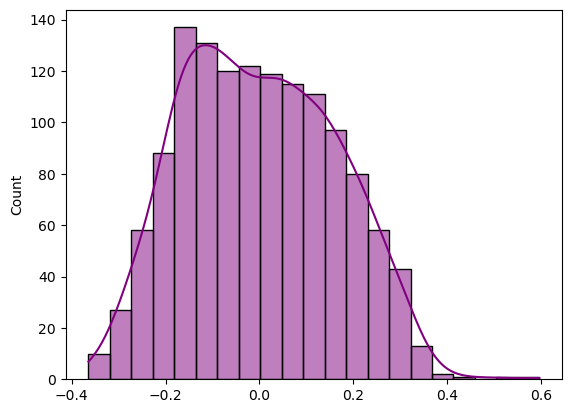

In [41]:
# Histograma dos resíduos
sns.histplot(modelo_v1.resid, kde = True, color = 'purple')

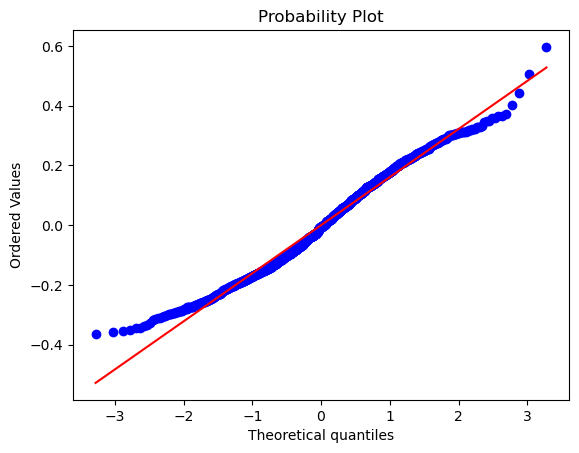

In [42]:
# QQ Plot
stats.probplot(modelo_v1.resid, dist = "norm", plot = pylab)
plt.show()

In [43]:
# Teste Shapiro wilk para verificar a normalidade dos resíduos:

# Função
def valida_sup_4(residuos):
    
    from scipy.stats import shapiro
    
    # Aplica o teste
    resultado = shapiro(residuos)
    
    # Extrai o valor-p
    pval = resultado.pvalue
    
    print('Valor-p =', pval)
    
    if pval < 0.05:
        print("Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!")
    else:
        print("Falhamos em rejeitar a H0. Isso indica que os resíduos seguem uma distribuição normal. Suposição satisfeita!")

In [44]:
valida_sup_4(modelo_v1.resid)

Valor-p = 2.3057530884607047e-10
Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!


### Multicolinearidade

In [45]:
# Função para checar o VIF de todas as variáveis
def valida_sup_5(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [46]:
VIF_l = valida_sup_5(X_treino)
VIF_l

,feature,VIF
0,log_condominio,324.091902
1,log_area,155.936918
2,log_distancia,3.721681
3,log_pm2,175.153752


## Aplicando a padronização dos dados

In [50]:
dados_4 = dados_1[((dados_1.condominio < 4000) & (dados_1.condominio>100))  & 
                  (dados_1.area<300) & (dados_1.pm2<55000) & (dados_1.distancia < 600)].copy()
dados_4 = dados_4[['condominio', 'area', 'distancia', 'pm2', 'log_preco']].copy()

# Separando X e Y
X = dados_4.drop(columns=alvo)
Y = dados_4[alvo]

# Divide os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.3 , random_state = 1)

# Aplicando Padronização
scaler = StandardScaler().fit(X)
X_treino_scaled = scaler.transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

In [57]:
train = pd.DataFrame(data = sm.add_constant(X_treino_scaled), columns=['constante','condominio', 'area', 'distancia', 'pm2'])



In [58]:
VIF_c = valida_sup_5(train)


In [59]:
VIF_c.drop(index=0, axis=0, inplace=True)
VIF_c.reset_index(inplace=True)
VIF_c

,index,feature,VIF
0,1,condominio,2.331870
1,2,area,1.985665
2,3,distancia,1.242787
3,4,pm2,1.496338


In [60]:
Tab_vif = pd.concat([VIF_l, VIF_c], axis=1)
Tab_vif.drop(columns=['index'], inplace=True)

In [61]:
#dfi.export(Tab_vif, 'Tab_VIF.png') 

### Criando segunda versão do modelo

In [62]:
# Adiciona a constante 
X_treino_const = sm.add_constant(X_treino_scaled)
X_teste_const = sm.add_constant(X_teste_scaled)

# Criando a segunda versão do modelo
modelo_v2 = sm.OLS(y_treino, X_treino_const).fit()

#Criando sumário estatístico do modelo
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_preco   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2260.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:14:59   Log-Likelihood:                 70.974
No. Observations:                1336   AIC:                            -131.9
Df Residuals:                    1331   BIC:                            -106.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1142      0.006   2243.919      0.000      14.102      14.127
x1             0.0882      0.010      9.165      0.000       0.069       0.107
x2             0.3549      0.009     40.087      0.000       0.338       0.372
x3            -0.0163      0.007     -2.325      0.020      -0.030      -0.003
x4             0.3823      0.008     49.163      0.000       0.367       0.398
==============================================================================
Omnibus:                       11.357   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.697
Skew:                          -0.194   Prob(JB):                      0.00288
Kurtosis:                       3.243   Cond. No.                         2.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
valida_sup_1(modelo_v2)

0.5401622837862786


,Valor-p,Alfa,Resultado
Valor-p do Rainbow Linearity Test,0.540162,0.05,Sucesso! Falhamos em rejeitar a H0 (Hipótese N...


In [64]:
valida_sup_2(modelo_v2.resid)

Resultado do teste: 2.027760122733637
Não há evidências de autocorrelação nos erros! Suposição satisfeita!


In [65]:
valida_sup_3(y_treino, X_treino_const)

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!


In [66]:
valida_sup_4(modelo_v2.resid)

Valor-p = 4.401959085953422e-05
Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!


In [67]:
tab_val_v2 = pd.DataFrame({'Suposicao': ['Linearidade', 'Independ_residuos', 'homocedasticidade', 'Normalidade_Residuos', 'VIF<5'],
                           'Teste': ['Linear_Rainbow', 'Durbin_Watson', 'Goldfeld-Quandt', 'Shapiro_Wilk', 'VIF'],
                           'Resultado': ['Aprovado', 'Aprovado', 'Aprovado', 'Reprovado', 'Aprovado']})
tab_val_v2

,Suposicao,Teste,Resultado
0,Linearidade,Linear_Rainbow,Aprovado
1,Independ_residuos,Durbin_Watson,Aprovado
2,homocedasticidade,Goldfeld-Quandt,Aprovado
3,Normalidade_Residuos,Shapiro_Wilk,Reprovado
4,VIF<5,VIF,Aprovado


In [68]:
#dfi.export(tab_val_v2, 'teste_v2.png')

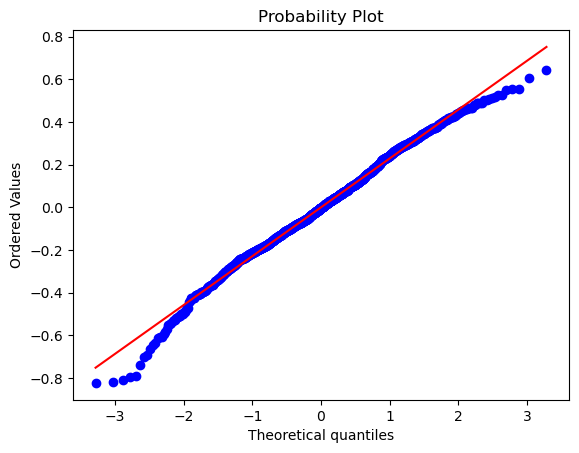

In [69]:
# QQ Plot
stats.probplot(modelo_v2.resid, dist = "norm", plot = pylab)
plt.show()

/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jguilhermed/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

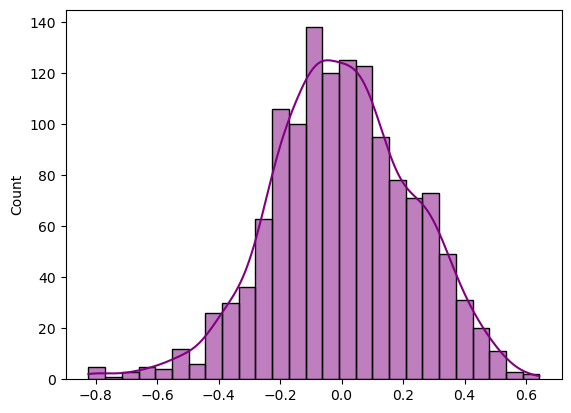

In [70]:
# Histograma dos resíduos
sns.histplot(modelo_v2.resid, kde = True, color = 'purple')

### A suposição 4 não foi validada, como já era esperado, pois a variável pm2 que é a razão entre preço e área e que sofreu uma distorção posteriormente provoca esse efeito na análise. Uma opção para lidar com isso é usar o modelo de regressão robusto, o RLM.

In [71]:
# Criando a segunda versão do modelo
modelo_v3 = sm.RLM(y_treino, X_treino_const, M=sm.robust.norms.HuberT()).fit()

#Criando sumário estatístico do modelo
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:              log_preco   No. Observations:                 1336
Model:                            RLM   Df Residuals:                     1331
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 19 Nov 2023                                         
Time:                        14:15:08                                         
No. Iterations:                    26                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1181      0.006   2233.749      0.000      14.106      14.131
x1             0.0891      0.010      9.218      0.000       0.070       0.108
x2             0.3642      0.009     40.942      0.000       0.347       0.382
x3            -0.0203      0.007     -2.887      0.004      -0.034      -0.007
x4             0.3782      0.008     48.409      0.000       0.363       0.394
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [72]:
valida_sup_2(modelo_v3.resid)

Resultado do teste: 2.02865889947831
Não há evidências de autocorrelação nos erros! Suposição satisfeita!


In [73]:
valida_sup_4(modelo_v3.resid)

Valor-p = 6.267654043767834e-06
Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!


In [74]:

r2_score(y_teste, modelo_v3.predict(X_teste_const))

0.8699158841045628

In [97]:
mae = mean_absolute_error(y_teste,modelo_v3.predict(X_teste_const))
rmse = mean_squared_error(y_teste, modelo_v3.predict(X_teste_const))
print(mae, rmse)

0.1806636798290097 0.05421541273715409


### Comparando OLS x RLM

In [114]:
tab_ols_rlm = pd.DataFrame({'Modelo': ['OLS','RLM'],
                            'MAE':[round(mean_absolute_error(y_teste,modelo_v2.predict(X_teste_const)),2), round(mean_absolute_error(y_teste,modelo_v3.predict(X_teste_const)),2)],
                            'RMSE': [round(mean_squared_error(y_teste, modelo_v2.predict(X_teste_const)),2), round(mean_squared_error(y_teste, modelo_v3.predict(X_teste_const)),2)],
                            'R2': [round(r2_score(y_teste, modelo_v2.predict(X_teste_const)),2), round(r2_score(y_teste, modelo_v3.predict(X_teste_const)),2)]} )

In [115]:
#dfi.export(tab_ols_rlm,'tab_ols_rlm.png')

[1119/171345.925232:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1119/171346.001401:WARNING:angle_platform_impl.cc(49)] RendererVk.cpp:1962 (initialize): ANGLE VMA version: 2003000
[1119/171346.004138:WARNING:sandbox_linux.cc(400)] InitializeSandbox() called with multiple threads in process gpu-process.
14963 bytes written to file /tmp/tmpihsxmj6u/temp.png


In [75]:
mols = modelo_v2.predict(X_teste_const)
mrlm = modelo_v3.predict(X_teste_const)

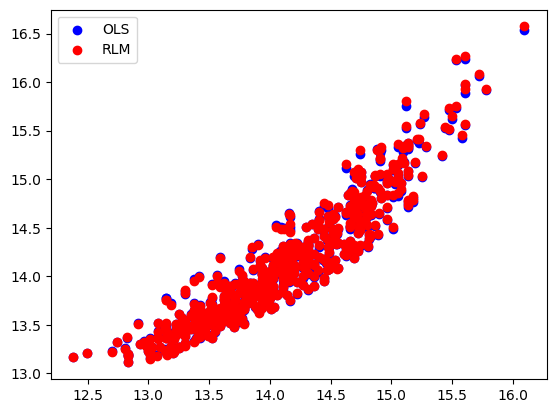

In [76]:
plt.scatter(x = y_teste, y = mols , c='b')
plt.scatter(x = y_teste, y = mrlm, c='r')
plt.legend(loc=2, labels=['OLS', 'RLM'])
plt.show()

**O comportamento quase idêntico dos modelos OLS e RLM é um forte indício de que a suposição da normalidade dos resíduos está sendo causada exclusivamente pela variável criada pm2 e não por presença de valores extremos. Para contornar isso, pode-se valer do uso de um modelo que não tenha tal suposição. Isso que será feito agora com o Random Forest Regressor.**

In [77]:
modelo_v4 = DecisionTreeRegressor()
modelo_v4.fit(X_treino_scaled, y_treino.values.ravel())

DecisionTreeRegressor()

In [78]:
r2_score(y_teste, modelo_v4.predict(X_teste_scaled))

0.8666115930578443

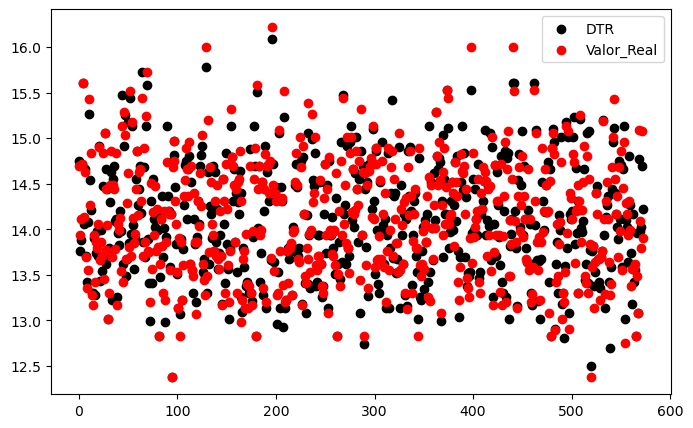

In [91]:
plt.figure(figsize=(8,5))
plt.scatter(x = range(len(X_teste)), y = y_teste, c='Black')
plt.scatter(x = range(len(X_teste)), y = modelo_v4.predict(X_teste_scaled), c='r')


plt.legend(['DTR', 'Valor_Real'])
plt.show()

In [80]:
modelo_v5 = RandomForestRegressor()

In [81]:
modelo_v5.fit(X_treino_scaled, y_treino.values.ravel())

RandomForestRegressor()

In [82]:
r2_score(y_teste, modelo_v5.predict(X_teste_scaled))

0.9206554230048196

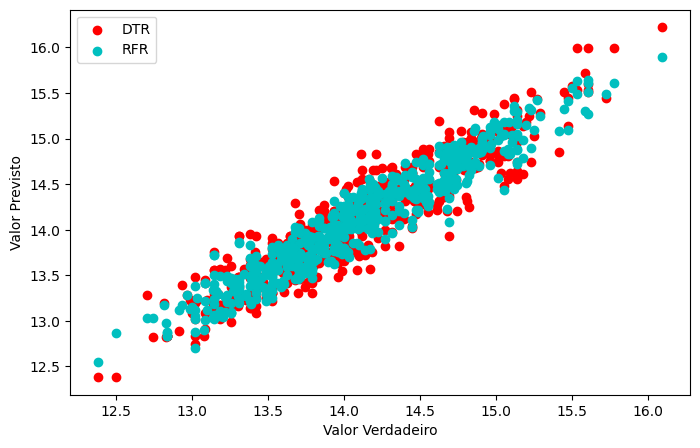

In [118]:
plt.figure(figsize=(8,5))

plt.scatter(x = y_teste, y = modelo_v4.predict(X_teste_scaled), c='r')
plt.scatter(x = y_teste, y = modelo_v5.predict(X_teste_scaled), c='c')
plt.xlabel("Valor Verdadeiro")
plt.ylabel('Valor Previsto')

plt.legend(loc = 2,labels=['DTR', 'RFR'])
plt.show()

In [84]:
modelo_v5.feature_importances_

array([0.45461649, 0.24145272, 0.01023941, 0.29369138])

In [85]:
modelo_v5.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

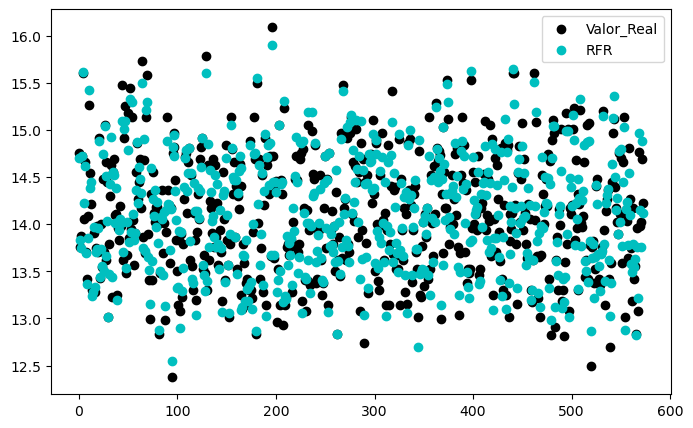

In [117]:
plt.figure(figsize=(8,5))
plt.scatter(x = range(len(X_teste)), y = y_teste, c='Black')
plt.scatter(x = range(len(X_teste)), y = modelo_v5.predict(X_teste_scaled), c='c')


plt.legend([ 'Valor_Real', 'RFR' ])
plt.show()

In [112]:
tab_dtr_rfr = pd.DataFrame({'Modelo': ['DTR','RFR'],
                            'MAE':[round(mean_absolute_error(y_teste,modelo_v4.predict(X_teste_scaled)),2), round(mean_absolute_error(y_teste,modelo_v5.predict(X_teste_scaled)),2)],
                            'RMSE': [round(mean_squared_error(y_teste, modelo_v4.predict(X_teste_scaled)),2), round(mean_squared_error(y_teste, modelo_v5.predict(X_teste_scaled)),2)],
                            'R2': [round(r2_score(y_teste, modelo_v4.predict(X_teste_scaled)),2), round(r2_score(y_teste, modelo_v5.predict(X_teste_scaled)),2)]} )
tab_dtr_rfr

,Modelo,MAE,RMSE,R2
0,DTR,0.18,0.06,0.87
1,RFR,0.14,0.03,0.92


In [113]:
#dfi.export(tab_dtr_rfr, 'tab_dtr_rfr.png')

[1119/171304.221264:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1119/171304.314638:WARNING:angle_platform_impl.cc(49)] RendererVk.cpp:1962 (initialize): ANGLE VMA version: 2003000
[1119/171304.317651:WARNING:sandbox_linux.cc(400)] InitializeSandbox() called with multiple threads in process gpu-process.
15067 bytes written to file /tmp/tmpngk98hdu/temp.png


In [122]:
q_geral = pd.concat([tab_dtr_rfr, tab_ols_rlm], axis=0)
q_geral

,Modelo,MAE,RMSE,R2
0,DTR,0.18,0.06,0.87
1,RFR,0.14,0.03,0.92
0,OLS,0.18,0.05,0.87
1,RLM,0.18,0.05,0.87


In [123]:
dfi.export(q_geral, 'q_geral.png')

[1119/175601.124588:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[1119/175601.200482:WARNING:angle_platform_impl.cc(49)] RendererVk.cpp:1962 (initialize): ANGLE VMA version: 2003000
[1119/175601.203254:WARNING:sandbox_linux.cc(400)] InitializeSandbox() called with multiple threads in process gpu-process.
19704 bytes written to file /tmp/tmps5pg2is7/temp.png


In [87]:
def aplica_modelo():
    condominio = float(input("Digite o valor do condomínio: "))
    area = float(input("Digite a área em metros quadrados: "))
    distancia = float(input("Digite a distância do centro do seu bairro em metros: "))
    valor = float(input("Digite o valor esperado do seu imóvel: "))
    pm2 = valor/area
    df_ent = pd.DataFrame({'condominio': [condominio],'area': [area],'distancia': [distancia],'pm2': [pm2]})
    arr_entrada = scaler.transform(df_ent)
    
    preco_sugerido = np.exp(modelo_v5.predict(arr_entrada))-1
    
    print(f"O valor ajustado do seu imóvel é: R$ {int(preco_sugerido)},00")
    
    return 

In [88]:
aplica_modelo()

Digite o valor do condomínio: 500
Digite a área em metros quadrados: 350
Digite a distância do centro do seu bairro em metros: 800
Digite o valor esperado do seu imóvel: 5000000
O valor ajustado do seu imóvel é: R$ 1710011,00
